# Predicting Diabetes with the BRFSS
Author: **Ramiz Khan**

<br>

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.


Diabetes is a chronic health condition that affects the transformation of food
into energy for the body. The disease exists as two major types:


*   **Type I Diabetes** - Autoimmune condition, body attacks insulin producing cells in pancreas, lack of insulin produced to regulate blood sugar
*   **Type II Diabetes** -  Pancreas is able to produce insulin, yet cells build resistance to insulin

<img src='https://drive.google.com/uc?id=1zgkWlUntCYPdBC9oAf0i1Qmb_aezHJft'>

The presumption around the types of diabetes are often linked by genetic vs environmental factors. Type II diabetes is heavily linked with obesity and is generalized to be acquired through lifestyle factors. Whereas Type I diabetes has a significant genetic link with hereditary effects.

Nonetheless, both types of diabetes are affected by both genetics and the individuals environment but this was an important consideration to note due to the limitations of the BRFSS survey data. Many of the questions answered from this survey are lifestyle based, and do not attribute to a persons genetic factors that may play a role for the presence of the disease, diabetes.

### Research Question

Can we accurately predict an individuals disease status (diabetes, pre diabetes, or no diabetes) using data derived from the BRFSS questionnare?

To answer this question we can explore various machine learning models and test them on our large dataset


## PART 1 - Exploratory Data Analysis

[Link to the data can be accessed here along with metadata and other information](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [2]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
# datatype structures in the dataset
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [6]:
# Factorize categorical variables
cat_index = [0,1,2,3,5,6,7,8,9,10,11,12,13,14,17,18,19,20,21]

for i in cat_index:
  codes, uniques = pd.factorize(df.iloc[:,i])
  df.iloc[:,i] = codes

In [8]:
# descriptive statistics
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.175844,0.570999,0.575879,0.037330,28.382364,0.556831,0.040571,0.094186,0.756544,0.634256,...,0.048947,0.084177,2.088143,3.184772,4.242081,0.831776,0.440342,4.588955,1.391726,3.344785
std,0.425951,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.148756,7.412847,8.717951,0.374066,0.496429,3.524922,1.178143,1.941887
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
50%,0.000000,1.000000,1.000000,0.000000,27.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,3.000000
75%,0.000000,1.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,3.000000,2.000000,3.000000,1.000000,1.000000,7.000000,3.000000,5.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,4.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,7.000000


In [9]:
# Check for any missing values
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


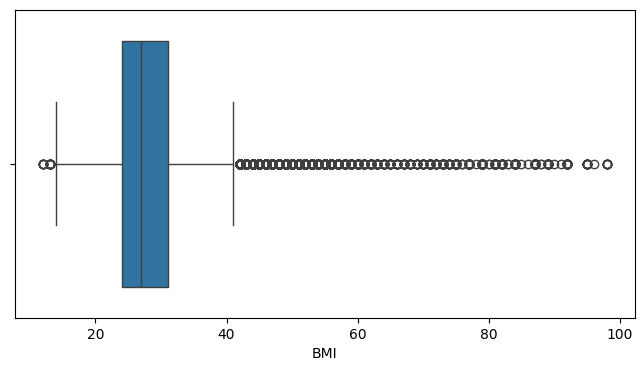

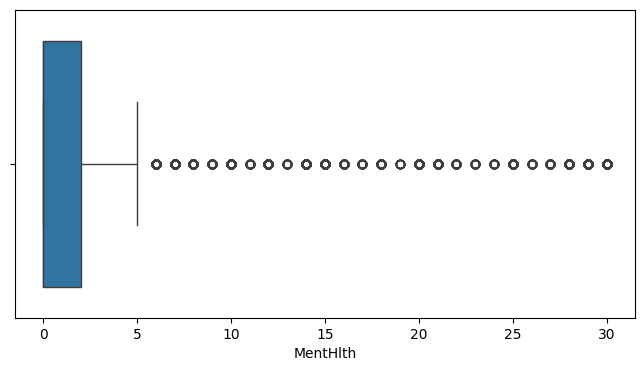

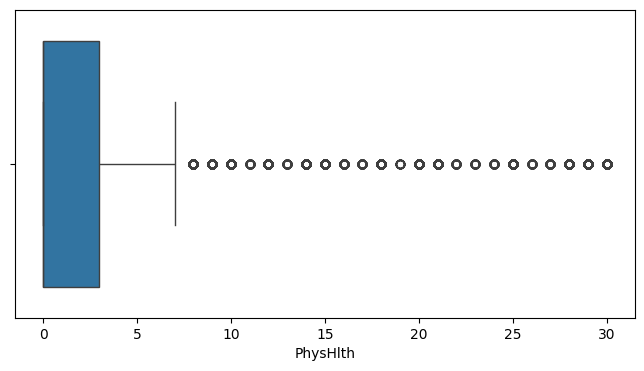

In [10]:
# Boxplot for continuous variables, checking for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BMI'])
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['MentHlth'])
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['PhysHlth'])
plt.show()

# many outliers...

Outliers in health scores contain outliers beyond the lower scores...removing these observations may be detrimental to the analysis <br>
**Solution** = Make BMI categorical, large number of outliers that will affect parametric models


In [ ]:
# Creating categories for BMI
bmi_categories = [(0, 18.5, 0),
                  (18.5, 25, 1),
                  (25, 30, 2),
                  (30, 35, 3),
                  (35, 40, 4),
                  (40, float('inf'), 5)]

bins = [x[0] for x in bmi_categories] + [float('inf')]
labels = [x[2] for x in bmi_categories]

# Using pd.cut to create categories and then converting to int
df['BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False).astype('int64')

**BMI Categories** <br>
0 - Underweight <br>
1 - Healthy <br>
2 - Overweight <br>
3 - Obesity Class 1 <br>
4 - Obesity Class 2 <br>
5 - Obesity Class 3 <br>

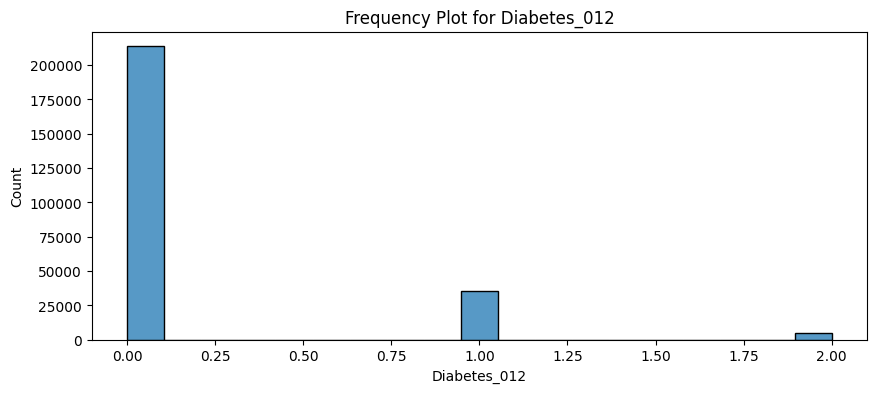

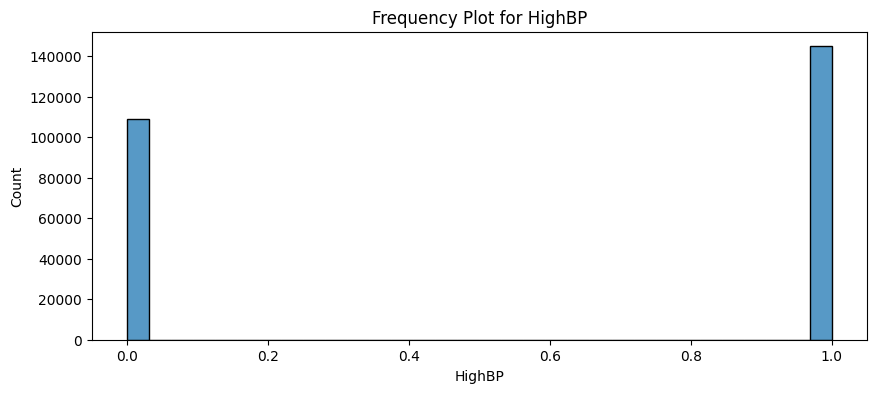

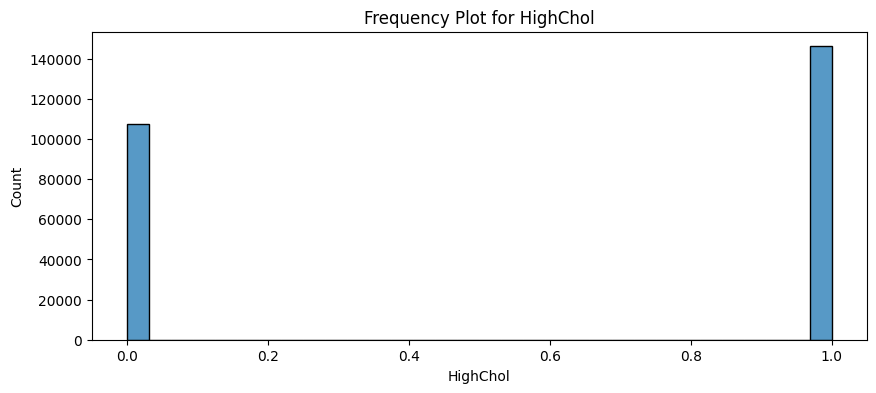

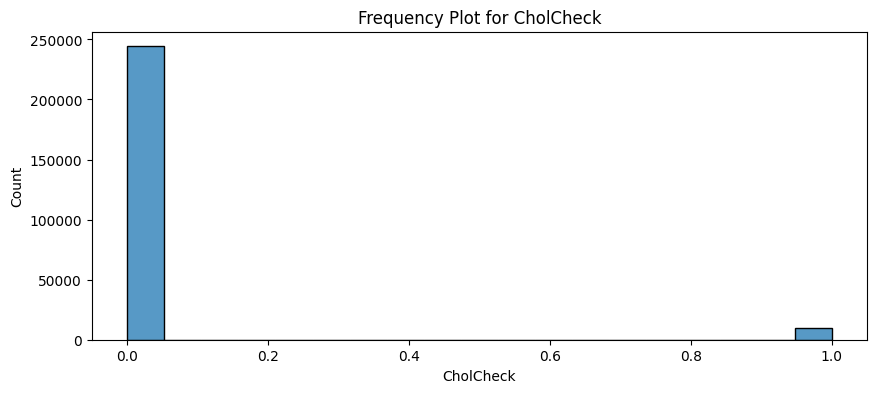

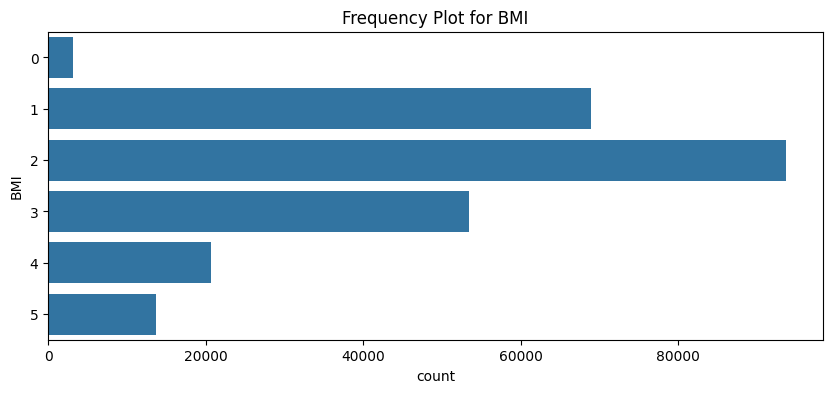

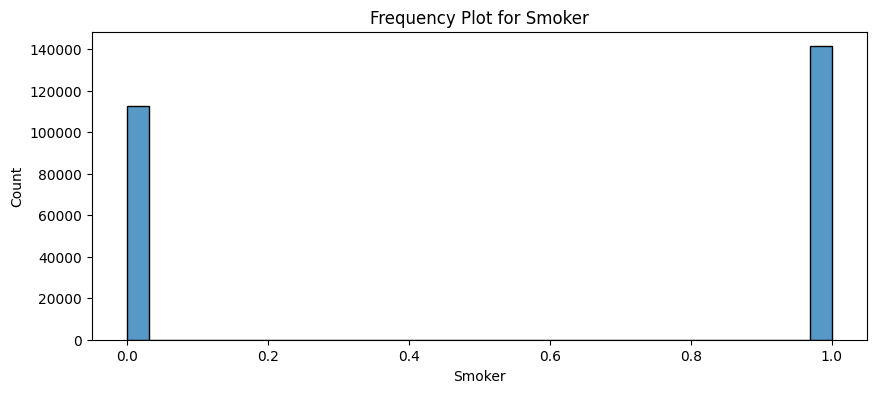

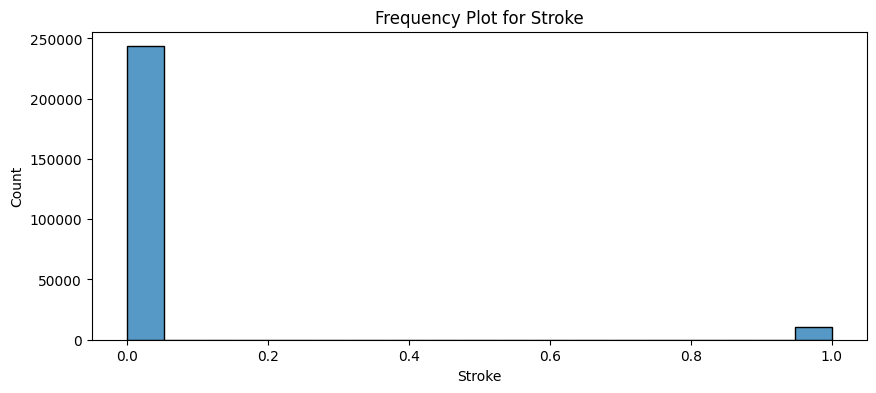

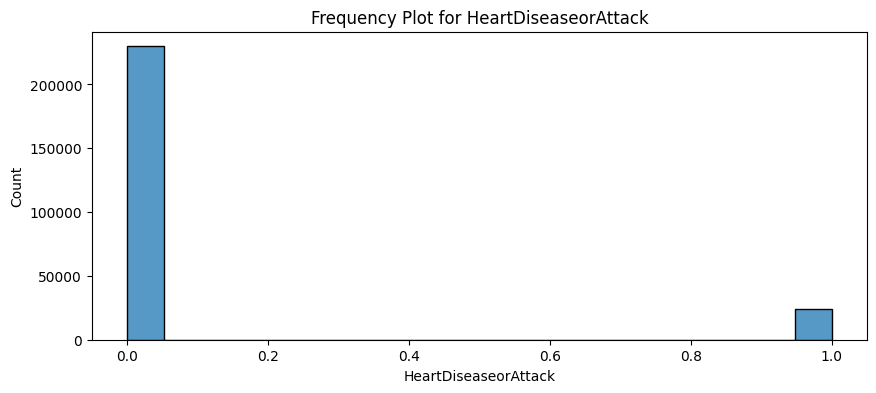

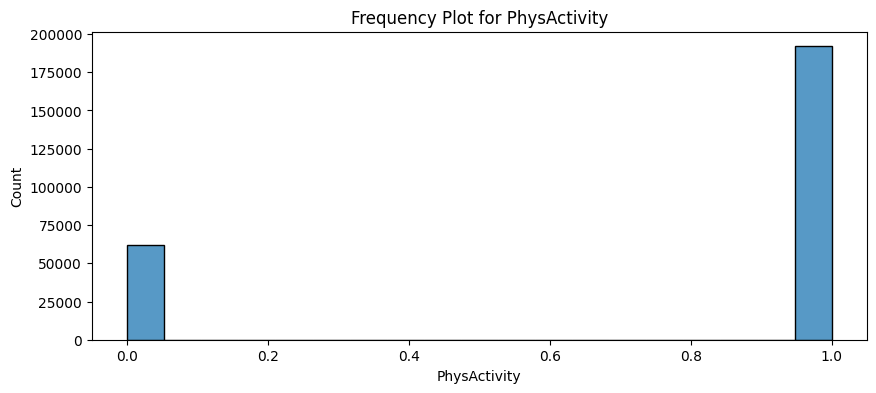

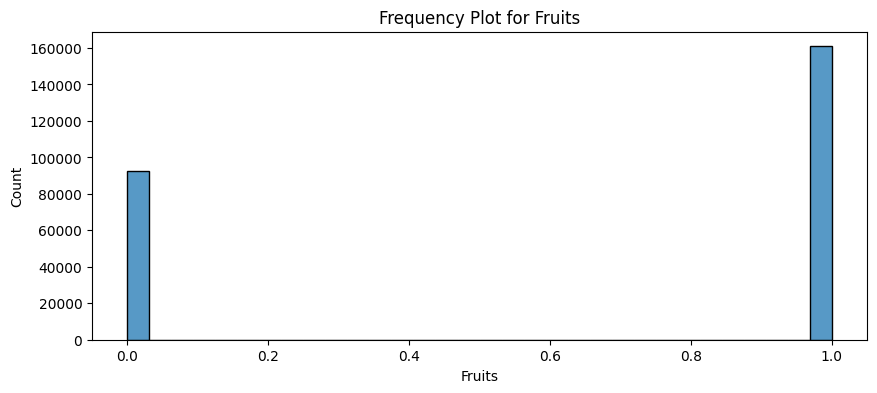

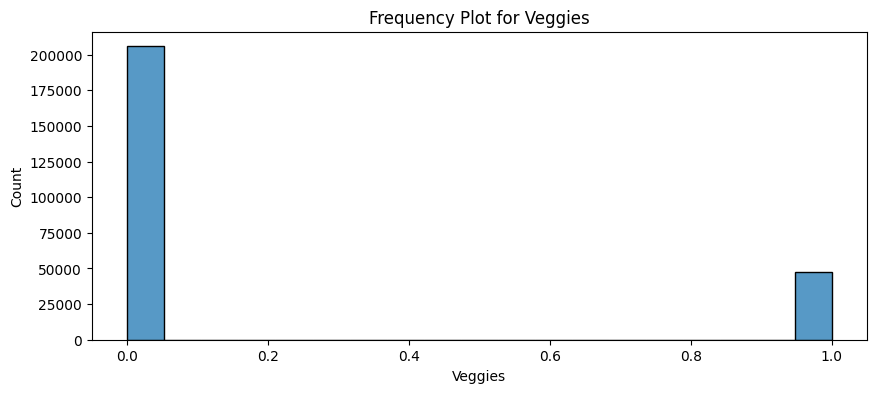

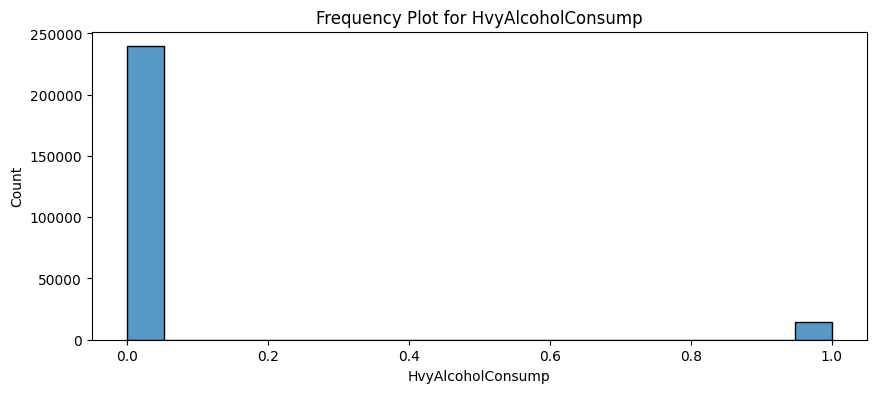

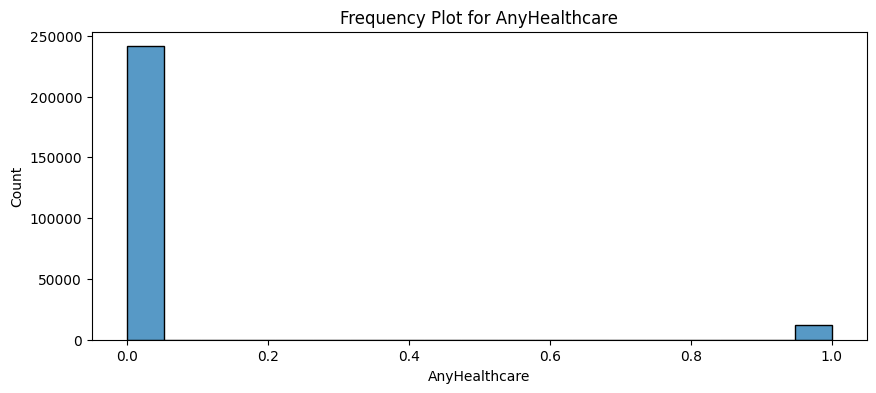

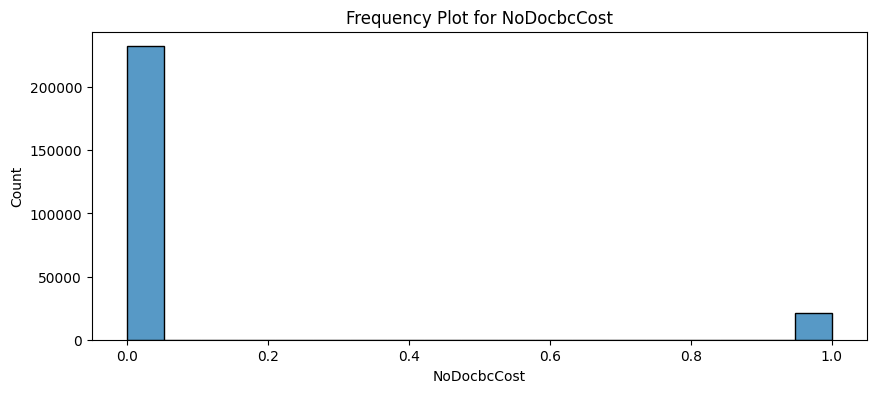

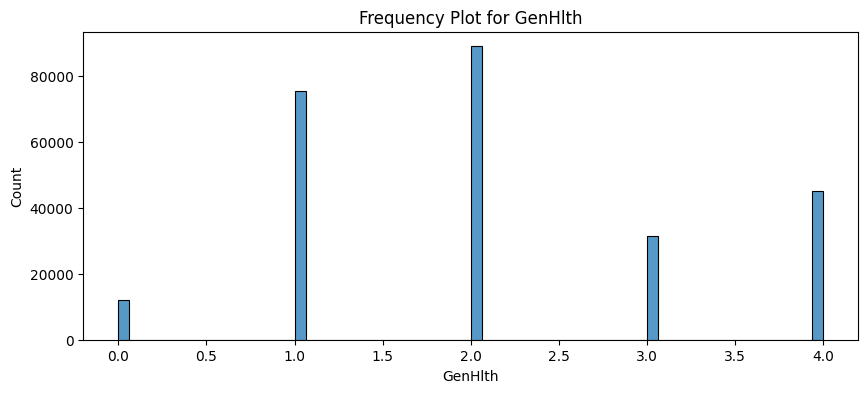

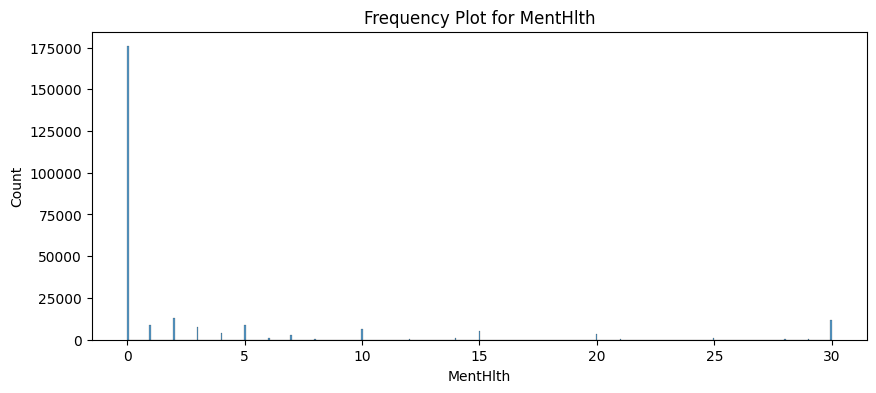

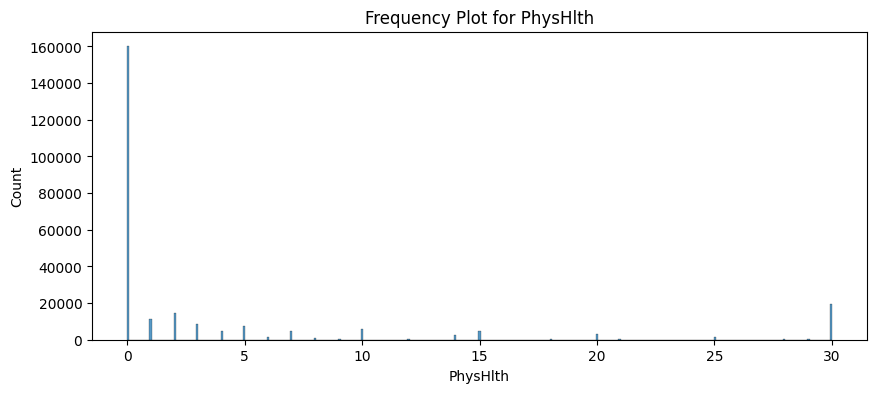

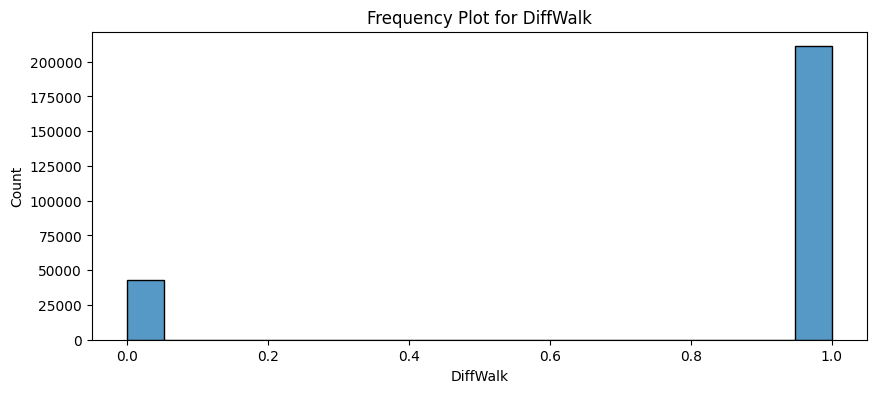

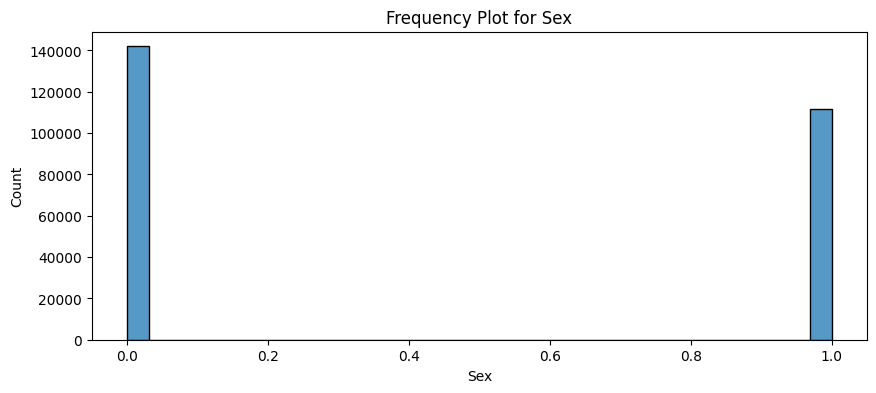

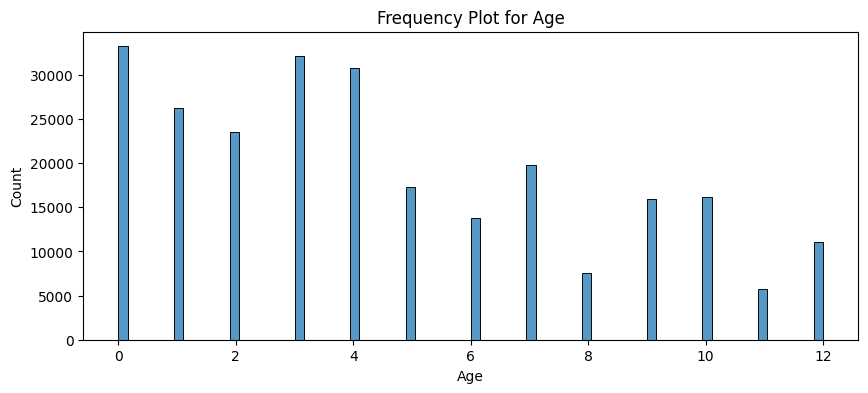

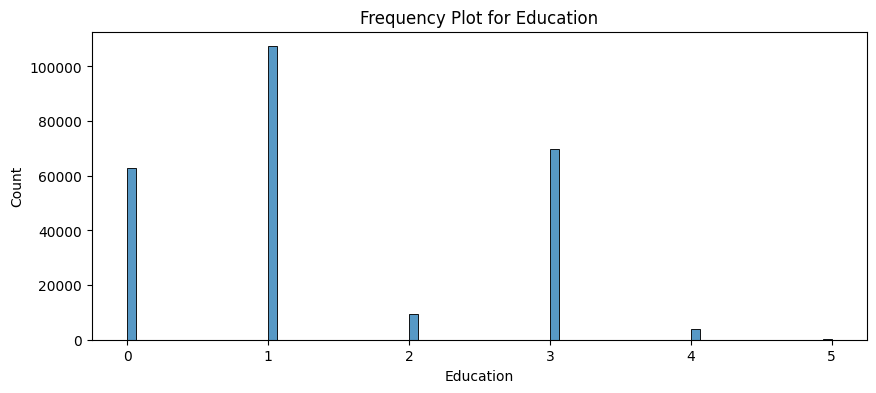

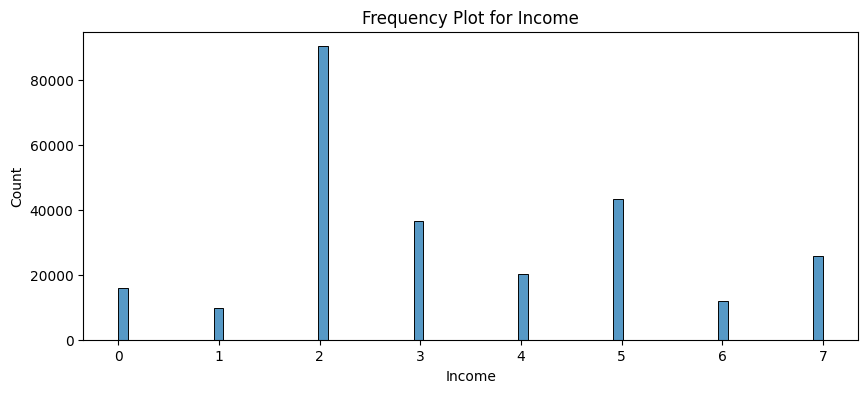

In [12]:
# Check for frequency of discrete values among the categorical variables
for column in df.columns:
    plt.figure(figsize=(10, 4))
    if df[column].dtype == 'int64':
        sns.countplot(y=column, data=df)
    else:  # For numerical data
        sns.histplot(df[column], kde=False)
    plt.title(f'Frequency Plot for {column}')
    plt.show()


Major issue in this data set is class imbalance, must take into consideration during model building

In [13]:
# Checking numericals frequency distribution of categorical columns
for column in df.columns:
    if df[column].dtype == 'int64':
      print(f"Frequency for {column}:")
      print(df[column].value_counts())
      print()

Frequency for BMI:
BMI
2    93749
1    68953
3    53451
4    20663
5    13737
0     3127
Name: count, dtype: int64



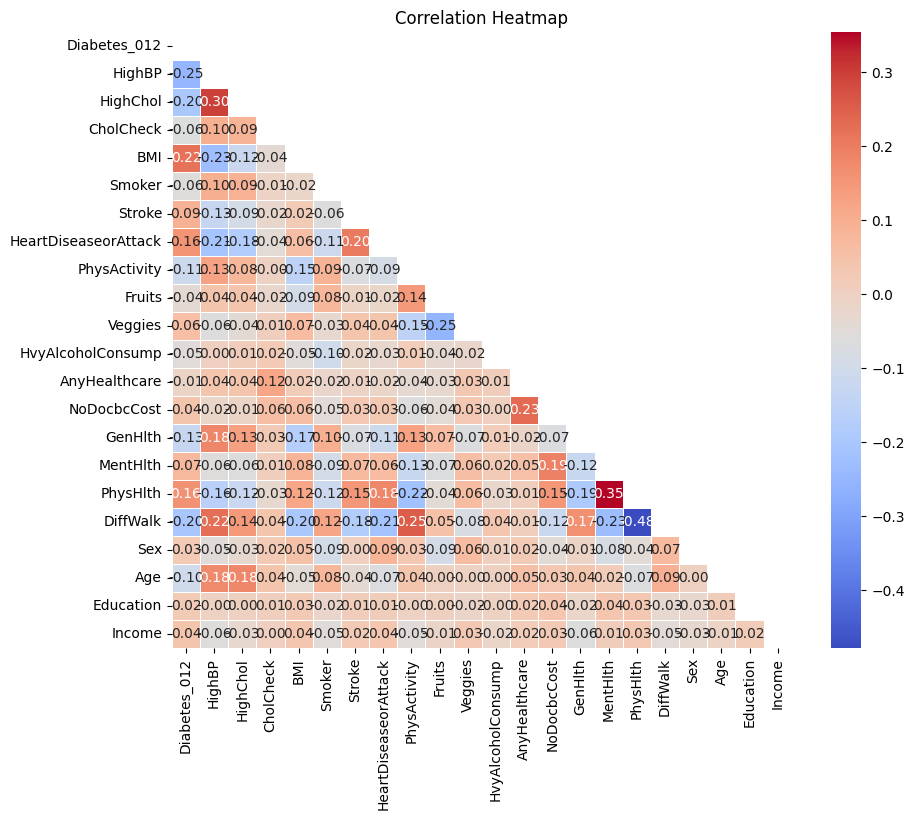

In [14]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

No significantly high correlation amongst the variables, multicollinearity or correlating effects will not be an issue

## PART 2 - Machine Learning

Due to inherent characteristics of the dataset such as


*   Class imbalances
*   Large number of observations
*   High dimensionality

To create an effective classification model, we can explore the following machine learning models and test their accuracy on diabetes prediction.

We will be using:

*   Gradient Boosting
*   Random Forest

Models to help solve the question:
*   *Creating an effective predictive model for presence of diabetes or pre-diabetes based on the questions found on the BRFSS survey*

### What is Gradient Boosting and Random Forest?

Lets take a step back here, these methods are optimized algorithms of the class of machine learning models called *Decision Trees* (DT for short)

Decision Trees are non-parametric supervised learning models that can be used for both classification and regression tasks, in our case it will be used for **classification** of the presence of diabetes <br>
<img src='https://drive.google.com/uc?id=1yGippU17M-pbCjtpXlggRzGS4QiNTXH9'>

**A decision tree in its true nature is very simple, while useful it sometimes is unable to account for complex relationships which can lead to overfitting**

This is where DT-based algorithms such as gradient boosting and random forests can be particularly useful. Their inherent structures, combined with features like hyperparameter tuning, make them more robust and reduce the likelihood of overfitting compared to a basic decision tree


*   The one drawback experienced with these is the computational power required for these algorithms, more powerful hardware and longer wait times is expected

---

#### Lets explore the two algorithms and their ability to predict diabetes
* We will use ROC, evaluating the AUC (Area under the Curve) to measure the predictive power of each model
* AUC is beneficial as it works well with unbalanced data and contains irrelevant to inherent thresholds




### (1) Gradient Boosting

In [15]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [16]:
X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']
# training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Perform Gradient Boosting
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', subsample = 0.6)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Evaluate the model using AUC
# Since it's a multi-class problem, outputs must be binarized then pooled
lb = LabelBinarizer()
lb.fit(y)
y_test_binarized = lb.transform(y_test)

# Calculate AUC for each class and take average
auc_scores = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovo', average='macro')
print("Average AUC Score:", auc_scores)

Average AUC Score: 0.7819969137974357


In [19]:
# Hyperparameter tuning using Bayesian optimization
import xgboost as xgb
from hyperopt import fmin, tpe, hp, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.metrics import accuracy_score

space = {
    'max_depth': scope.int(hp.quniform('max_depth', 2, 8, 1)),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0), #added after last runtime see results first before deleting
}

def objective(params):
    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)
print("Best set of hyperparameters: ", best_params)
'''

'\nimport xgboost as xgb\nfrom hyperopt import fmin, tpe, hp, STATUS_OK\nfrom hyperopt.pyll.base import scope\nfrom sklearn.metrics import accuracy_score\n\nspace = {\n    \'max_depth\': scope.int(hp.quniform(\'max_depth\', 2, 8, 1)),\n    \'learning_rate\': hp.loguniform(\'learning_rate\', -5, -2),\n    \'subsample\': hp.uniform(\'subsample\', 0.5, 1),\n    \'reg_alpha\': hp.uniform(\'reg_alpha\', 0.0, 1.0), #added after last runtime see results first before deleting\n}\n\ndef objective(params):\n    xgb_model = xgb.XGBClassifier(**params)\n    xgb_model.fit(X_train, y_train)\n    y_pred = xgb_model.predict(X_test)\n    score = accuracy_score(y_test, y_pred)\n    return {\'loss\': -score, \'status\': STATUS_OK}\n\n# Perform the optimization\nbest_params = fmin(objective, space, algo=tpe.suggest, max_evals=100)\nprint("Best set of hyperparameters: ", best_params)\n'

In [20]:
# Hypertuned Gradient Boosting
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate = 0.1, max_depth = 5, subsample = 0.7)
model.fit(X_train, y_train)

# Predictions from hypertuned model
y_pred_prob = model.predict_proba(X_test)

# Evaluate hypertuned model using AUC
lb = LabelBinarizer()
lb.fit(y)
y_test_binarized = lb.transform(y_test)

# Calculate AUC for each class and take average
auc_scores = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovo', average='macro')
print("Average AUC Score:", auc_scores)

Average AUC Score: 0.7882211640739278


### (2) Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer

# Split into training and testing sets (70/30)
X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Random Forest Classification
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Evaluate the model using AUC
# Since it's a multi-class problem, you'll need to binarize the output
lb = LabelBinarizer()
lb.fit(y)
y_test_binarized = lb.transform(y_test)

# Calculate AUC for each class and take average
auc_scores = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovo', average='macro')
print("Average AUC Score:", auc_scores)

Average AUC Score: 0.7263794689369028


In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll.base import scope

space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth':  scope.int(hp.quniform('max_depth', 3, 7, 2)),
        'max_features': hp.choice('max_features', ['sqrt','log2', None]),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 100])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 n_estimators = space['n_estimators'],
                                 )

    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
from sklearn.model_selection import cross_val_score

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 50,
            trials= trials)

print(best)

In [24]:
# Hypertuned Random Forest Classification
model = RandomForestClassifier(max_depth = 6, max_features = 2, n_estimators = 2, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_prob = model.predict_proba(X_test)

# Evaluate the model using AUC
# Since it's a multi-class problem, you'll need to binarize the output
lb = LabelBinarizer()
lb.fit(y)
y_test_binarized = lb.transform(y_test)

# Calculate AUC for each class and take average
auc_scores = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovo', average='macro')
print("Average AUC Score:", auc_scores)

Average AUC Score: 0.7318438868349485


## Conclusion

Using Gradient Boosting and Random Forest models, we acheived **AUC scores of 0.79 and 0.73 respectively** <br>
The hypertuned gradient boosted model performed exceptionally well compared to the random forest. 

AUC score nearing 0.79 seems promising, in the context of using BRFSS survey questions to predict diabetes or pre-diabetes among citizens in the United States

### Future Direction
Increase data collection
* Very few observable cases of diabetes compared to no diabetes or pre-diabetes in the dataset
* Distinguish labeled targets as Type I vs Type II diabetes (more insight about environmental vs genetic factors)

<br>

Further Model Exploration
* Attempt future selection using L1 penalty or other methods
* Investigate the use of neural networks in creating a robust classification scheme

<br>

Incorporate domain literature
* Many new findings regarding risk factors towards diabetes, scientific literature can be parsed to better adapt to feature selection and model choice

If you enjoyed reading about this project or would like to connect and ask any questions, feel free to reach out to me via:
* https://www.linkedin.com/in/rwkhan01/
* https://RamizK01.github.io